In [9]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from src.metrics import dice_coef, dice_norm_metric
from src.ensemble import get_de_preds, get_le_preds

# Validation

In [10]:
le_validation_fpath = Path('models')/'LE_validation.npz'
de_validation_fpath = Path('models')/'DE_validation.npz'

le_preds, targets = get_le_preds(le_validation_fpath)

de_preds, targets = get_de_preds(de_validation_fpath)

preds = dict(**le_preds, **de_preds)
preds.keys()

dict_keys(['le_layer_00', 'le_mean_starting_at_00', 'le_layer_01', 'le_mean_starting_at_01', 'le_layer_02', 'le_mean_starting_at_02', 'le_layer_03', 'le_mean_starting_at_03', 'le_layer_04', 'le_mean_starting_at_04', 'le_layer_05', 'le_mean_starting_at_05', 'le_layer_06', 'le_mean_starting_at_06', 'le_layer_07', 'le_mean_starting_at_07', 'le_layer_08', 'le_mean_starting_at_08', 'le_layer_09', 'le_mean_starting_at_09', 'le_layer_10', 'le_mean_starting_at_10', 'le_layer_11', 'le_mean_starting_at_11', 'unet_0', 'unet_1', 'unet_2', 'unet_3', 'unet_4', 'mean_ensemble'])

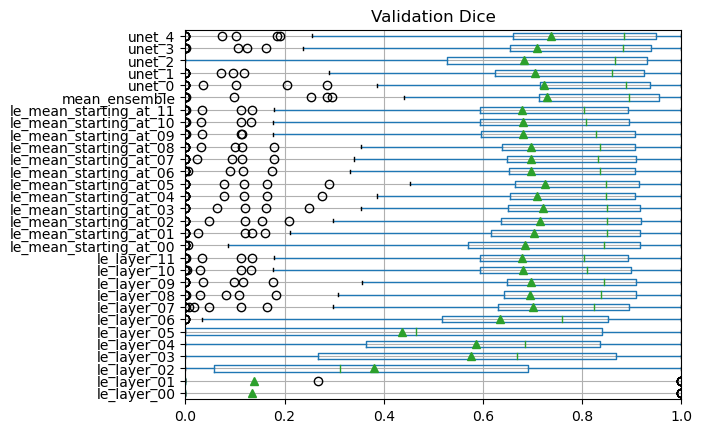

In [27]:
dice_scores = dict()
for model in preds.keys():
    dice_scores[model] = list()
    for pred, target in zip(preds[model], targets):
        dice_scores[model].append(dice_coef(pred, target))

df_dice = pd.DataFrame(dice_scores)
df_dice = df_dice.sort_index(axis=1)

df_dice.boxplot(vert=False, showmeans=True)
plt.title('Validation Dice')
plt.xlim((0,1))
plt.show()

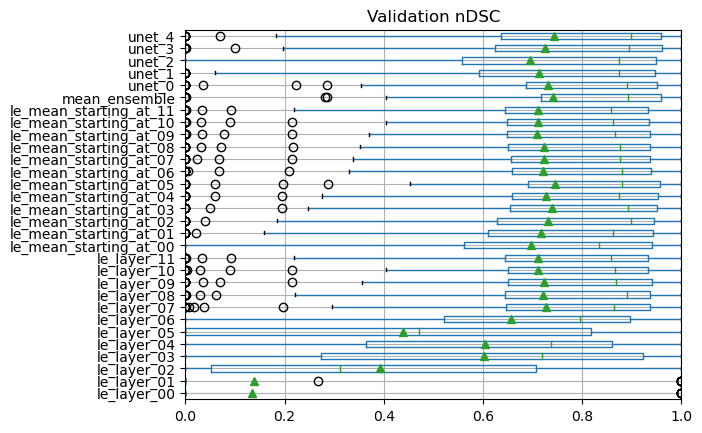

In [29]:
ndsc_scores = dict()
for model in preds.keys():
    ndsc_scores[model] = list()
    for pred, target in zip(preds[model], targets):
        ndsc_scores[model].append(dice_norm_metric(pred, target))

df_ndsc = pd.DataFrame(ndsc_scores)
df_ndsc = df_ndsc.sort_index(axis=1)

df_ndsc.boxplot(vert=False, showmeans=True)
plt.title('Validation nDSC')
plt.xlim((0,1))
plt.show()

# Test

In [33]:
le_test_fpath = Path('models')/'LE_test.npz'
de_test_fpath = Path('models')/'DE_test.npz'

le_preds, targets = get_le_preds(le_test_fpath)

de_preds, targets = get_de_preds(de_test_fpath)

preds = dict(**le_preds, **de_preds)

test_models = ['unet_0', 'unet_1', 'unet_2', 'unet_3', 'unet_4', 'mean_ensemble',
               'le_mean_starting_at_05', 'le_layer_11']
preds = {k: v for k, v in preds.items() if k in test_models}
preds.keys()

dict_keys(['le_mean_starting_at_05', 'le_layer_11', 'unet_0', 'unet_1', 'unet_2', 'unet_3', 'unet_4', 'mean_ensemble'])

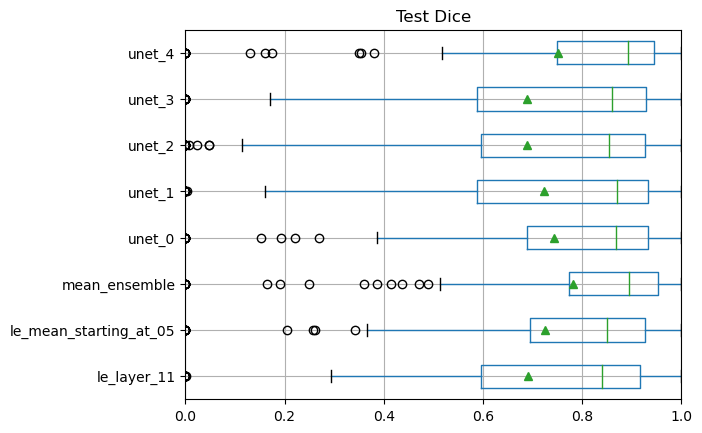

In [34]:
ndsc_scores = dict()
for model in preds.keys():
    ndsc_scores[model] = list()
    for pred, target in zip(preds[model], targets):
        ndsc_scores[model].append(dice_coef(pred, target))

df_ndsc = pd.DataFrame(ndsc_scores)
df_ndsc = df_ndsc.sort_index(axis=1)

df_ndsc.boxplot(vert=False, showmeans=True)
plt.title('Test Dice')
plt.xlim((0,1))
plt.show()

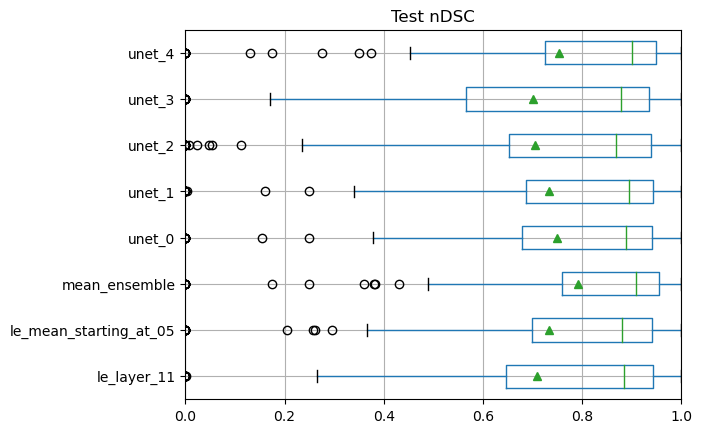

In [35]:
ndsc_scores = dict()
for model in preds.keys():
    ndsc_scores[model] = list()
    for pred, target in zip(preds[model], targets):
        ndsc_scores[model].append(dice_norm_metric(pred, target))

df_ndsc = pd.DataFrame(ndsc_scores)
df_ndsc = df_ndsc.sort_index(axis=1)

df_ndsc.boxplot(vert=False, showmeans=True)
plt.title('Test nDSC')
plt.xlim((0,1))
plt.show()